In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

from utils import *

%matplotlib inline
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn

### Descrição dos dados


**num_boletim**: Número do Boletim de Ocorrência, exemplo: 206099 ou 2016-000009920-001

**data_boletim**: Data do acidente registrada no Boletim de Ocorrência, exemplo: 24/4/1999

**hora_boletim**: Hora do acidente registrada no Boletim de Ocorrência, exemplo: 18:10:00

**N_envolvido**: Número do envolvido no acidente, exemplo: 1 - Paulo Sergio da Silva, 2 - Lorival Oliveira Franco.

**condutor**: Indica se o envolvido no acidente é condutor ou não. Valores possiveis: 'S'- sim, 'N' - Nao e 0 - Não informado.

**cod_severidade**: Codigo da severidade. Exemplo: 0 - não informado, 1 - não fatal, 2 - fatal, 3 - sem ferimentos.

**desc_severidade**: Descrição da severidade.

**sexo**: Sexo do envolvido. Valores possíveis: M-Masculino, F-Feminino e 0-Não informado.

**cinto_seguranca**: Indica se o envolvido no acidente estava usando o cinto de segurança.

**Embreagues**: Indica se o envolvido no acidente estava embriagado.

**Idade**: Idade do envolvido. Exemplo: 26.

**nascimento**: Data de nascimento do envolvido. Exemplo: 14/11/1974.

**categoria_habilitacao**: Codigo da categoria de habilitacao. Exemplo: IN - Inabilitado, N - Nao informado, B - veiculos motor, com ate 8 passageiros, peso 
maximo 3500 kg, C - veic. motor p/ transp. de carga, c/ peso max. aut. 3500 kg.
**descricao_habilitacao**: Calculado a partir do valor de "categoria_habilitacao".

**declaracao_obito**: Número da declaração de óbito.

**cod_severidade_antiga**: Código da severidade antiga. Exemplo: 0 - nao informado, 1 - nao fatal, 2 - fatal, 3 - sem ferimentos.

**especie_veiculo**: Descrição do código da especie do veículo. Exemplos: 1 - bicicleta, 2 - ciclomotor, 3 - motoneta, 4 - motocicleta, 5 - triciclo, 6 - 
automóvel.
**pedestre**:Indicativo de Pedestre (para os acidentes a partir de 2015). Exemplo: 0 - nao informado, S - Sim, N - Nao.

**passageiro**: Indicativo de Passageiro. Exemplo: 0 - nao informado, S - Sim, N - Nao.


In [2]:
# new_file = open('new_detran2.csv', "r+")
# with open('./teste.csv', encoding='utf-8') as file: 
#     for i in file:
# #         print(i.replace(",", ";"))
#         new_file.write(i.replace(";", ","))
    
# new_file.close()

df_2018 = pd.read_csv('new_detran_2018.csv')
df_2021 = pd.read_csv('new_detran_2021.csv')

mes_2018 = []
mes_2021 = []

for i in df_2018['data_boletim']:
    a = i.split('/')
    mes_2018.append(a[1])

for i in df_2021['data_boletim']:
    a = i.split('/')
    mes_2021.append(a[1])

mes_2018 = np.sort(mes_2018)
mes_2021 = np.sort(mes_2021)

acidentes_2018 = num_acidentes(mes_2018)
# print(acidentes_2018)

acidentes_2021 = num_acidentes(mes_2021)
# print(acidentes_2021)



## Histograma

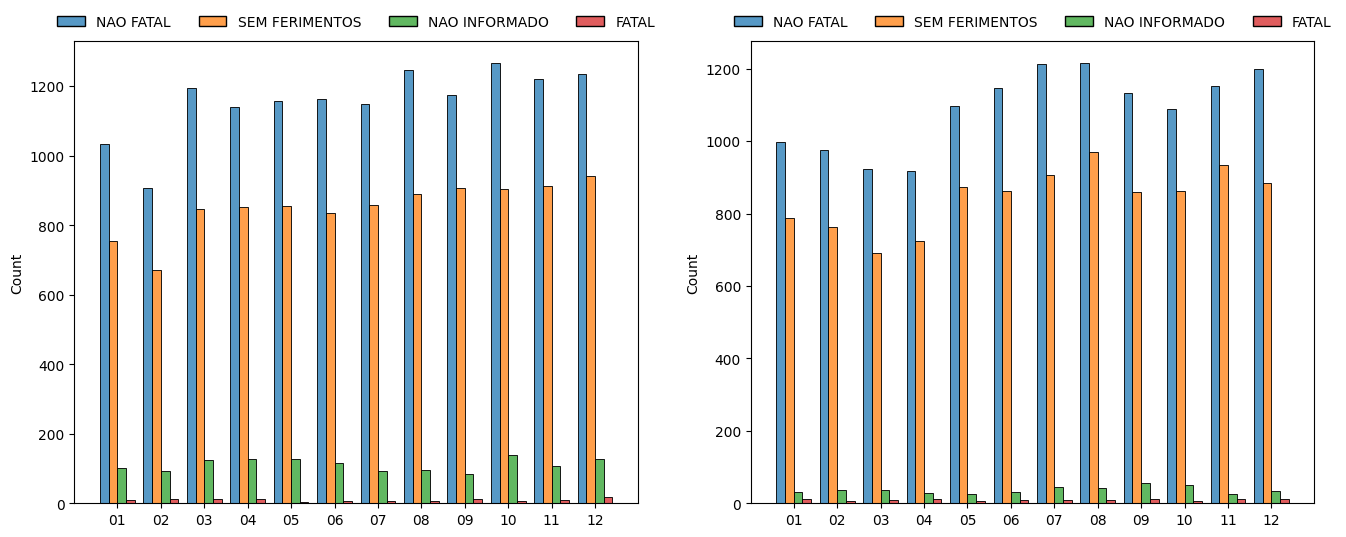

In [3]:
# plt.figure(figsize=(8,4))
# sns.scatterplot(data=df_2018, x=lista, y='desc_severidade', hue='data_boletim')
# plt.show()

order = ['NAO FATAL', 'SEM FERIMENTOS', 'NAO INFORMADO', 'FATAL']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
a = sns.histplot(data=df_2018, bins=12, x=mes_2018, hue='desc_severidade', hue_order=order, multiple='dodge', shrink=0.8, ax=axes[0])
b = sns.histplot(data=df_2021, bins=12, x=mes_2021, hue='desc_severidade', hue_order=order, multiple='dodge', shrink=0.8, ax=axes[1])
sns.move_legend(a, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
sns.move_legend(b, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)

plt.show()

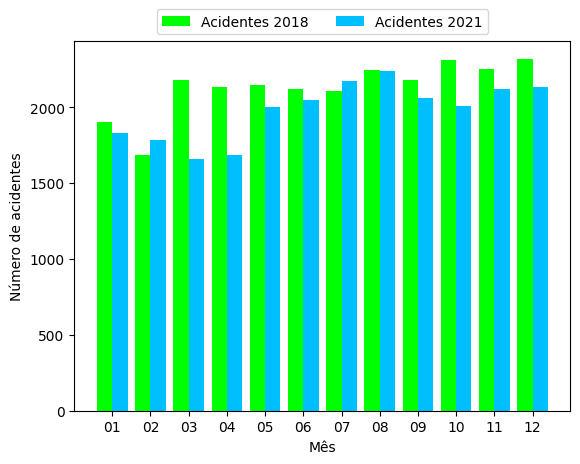

In [32]:
x = np.array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])

X_axis = np.arange(len(x))

y_2018 = acidentes_2018
y_2021 = acidentes_2021

plt.bar(X_axis - 0.2, y_2018, 0.4, label= 'Acidentes 2018', color=['lime'])
plt.bar(X_axis + 0.2, y_2021, 0.4, label= 'Acidentes 2021', color=['deepskyblue'])

plt.xticks(X_axis, x)
plt.xlabel("Mês")
plt.ylabel("Número de acidentes")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2)

plt.show()

In [66]:
dia_mes_2018 = []

for i in df_2018['data_boletim']:
    a = i.split('/')
    dia_mes_2018.append(a[0] + '/' + a[1])

# dia_mes_2018 = np.array(dia_mes_2018)
# dia_mes_2018 = np.sort(dia_mes_2018)


acidentes2 = []
  
counter = collections.Counter(dia_mes_2018)
c = collections.OrderedDict(sorted(counter.items()))
for i in counter.keys():
    acidentes2.append(counter[f'{i}'])

print(type()c)

# x = np.linspace(0, 10, 30)
# y = np.sin(x)

# plt.plot(x, y, '-ok')
# plt.show()

OrderedDict([('01/01', 44), ('01/02', 66), ('01/03', 84), ('01/04', 33), ('01/05', 52), ('01/06', 36), ('01/07', 48), ('01/08', 81), ('01/09', 73), ('01/10', 77), ('01/11', 99), ('01/12', 73), ('02/01', 53), ('02/02', 66), ('02/03', 76), ('02/04', 67), ('02/05', 100), ('02/06', 51), ('02/07', 51), ('02/08', 108), ('02/09', 58), ('02/10', 82), ('02/11', 53), ('02/12', 49), ('03/01', 46), ('03/02', 54), ('03/03', 61), ('03/04', 68), ('03/05', 46), ('03/06', 58), ('03/07', 64), ('03/08', 67), ('03/09', 76), ('03/10', 97), ('03/11', 74), ('03/12', 65), ('04/01', 64), ('04/02', 51), ('04/03', 62), ('04/04', 80), ('04/05', 97), ('04/06', 59), ('04/07', 81), ('04/08', 72), ('04/09', 78), ('04/10', 74), ('04/11', 47), ('04/12', 97), ('05/01', 40), ('05/02', 78), ('05/03', 65), ('05/04', 95), ('05/05', 88), ('05/06', 85), ('05/07', 83), ('05/08', 70), ('05/09', 85), ('05/10', 80), ('05/11', 77), ('05/12', 73), ('06/01', 50), ('06/02', 67), ('06/03', 73), ('06/04', 75), ('06/05', 64), ('06/06', 